**Álvaro Herreruela y Borja Gómez Sopeña**

# Lab assignment: the hunger games

<table><tr>
    <td><img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/breakfast.jpg" style="width:300px;height:300px;"></td>
    <td><img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/hamburger.jpg" style="width:300px;height:300px;"></td>
    <td><img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/fruits.jpg" style="width:300px;height:300px;"></td>
</tr></table>

In this assignment we will face a challenging image classification problem, building a deep learning model that is able to classify different kinds of foods. Let the hunger games begin!

## Guidelines

Throughout this notebook you will find empty cells that you will need to fill with your own code. Follow the instructions in the notebook and pay special attention to the following symbols.

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
You will need to solve a question by writing your own code or answer in the cell immediately below or in a different file, as instructed.</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
This is a hint or useful observation that can help you solve this assignment. You should pay attention to these hints to better understand the assignment.
</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/pro.png" height="80" width="80" style="float: right;"/>

***
<font color=#259b4c>
This is an advanced exercise that can help you gain a deeper knowledge into the topic. Good luck!</font>

***

To avoid missing packages and compatibility issues you should run this notebook under one of the [recommended Deep Learning environment files](https://github.com/albarji/teaching-environments/tree/master/deeplearning), or make use of [Google Colaboratory](https://colab.research.google.com/). If you use Colaboratory make sure to [activate GPU support](https://colab.research.google.com/notebooks/gpu.ipynb).

The following code will embed any plots into the notebook instead of generating a new window:

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Lastly, if you need any help on the usage of a Python function you can place the writing cursor over its name and press Caps+Shift to produce a pop-out with related documentation. This will only work inside code cells. 

Let's go!

## Data acquisition

We will use a food images dataset available at [Kaggle](https://www.kaggle.com/trolukovich/food11-image-dataset). To download it you will need to create a user account in Kaggle, and obtain your API credential by following the instructions on [this section](https://www.kaggle.com/trolukovich/food11-image-dataset). Once you have your credentials JSON file, you can inform this notebook of them by setting the appropriate enviroment variables, as follows

    import os

    os.environ["KAGGLE_USERNAME"] = "YOUR KAGGLE USERNAME HERE"
    os.environ["KAGGLE_KEY"] = "YOUR KAGGLE KEY HERE"
    
Once this is done, you will be able to download the dataset to this computer using the command

    !kaggle datasets download trolukovich/food11-image-dataset --unzip -p YOUR_LOCAL_FOLDER
    
where you should write a valid directory in your computer in "YOUR_LOCAL_FOLDER". If you are fine with downloading the data in the same folder as this notebook, just skip the `-p YOUR_LOCAL_FOLDER` part of the command.

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
Create a Kaggle account, obtain your credentials, and use the cell below to declare your Kaggle username and key variables, and to download the dataset to a local folder.
    
These credentials should remain secret to you. Remember to delete them before submitting this notebook!
</font>

***

In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ["KAGGLE_USERNAME"] = ""
os.environ["KAGGLE_KEY"] = ""

In [ ]:
!kaggle datasets download trolukovich/food11-image-dataset --unzip -p YOUR_LOCAL_FOLDER

 99% 1.07G/1.08G [00:06<00:00, 171MB/s]
100% 1.08G/1.08G [00:06<00:00, 188MB/s]


Take now a look into the folder where you downloaded the data. You will find it is made up of three subfolders:

* **training**, containing the images to use to train the model.
* **validation**, containing additional images you could use as more training data, or for some kind of validation strategy such as Early Stopping.
* **evaluation**, containing the images you must use to test your model. Images in this folder can **only** be used to measure the model performance after the training procedure is completed.

Furthermore, within each one of these folders you will find one folder for each one of the 11 classes in this problem:

* Bread
* Dairy product
* Dessert
* Egg
* Fried food
* Meat
* Noodles-Pasta
* Rice
* Seafood
* Soup
* Vegetable-Fruit

This is a standard structure for organizing image datasets: one folder per class. To easen the following data processing steps, let us define some variables telling us where the data is located.

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
    Create variables <b>TRAINDIR</b>, <b>VALDIR</b> and <b>TESTDIR</b> with the paths to the folders with the training, validation and evaluation data, respectively.
</font>

***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.listdir('/content/YOUR_LOCAL_FOLDER')

['training', 'validation', 'evaluation']

In [ ]:
import shutil
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator()
TRAINDIR = '/content/YOUR_LOCAL_FOLDER/training'
VALDIR = '/content/YOUR_LOCAL_FOLDER/validation'
TESTDIR = '/content/YOUR_LOCAL_FOLDER/evaluation'

Let's plot a random sample of training images from each class, using the ipyplot package. If you are running this notebook in Google Colab, you will need to install this package first with

    !pip install ipyplot

You can inspect each class by clicking the different tabs in the interface that will appear when running the following cell.

In [ ]:
!pip install ipyplot

In [ ]:
from glob import glob
import ipyplot
import numpy as np

# all_images = glob(f"{TRAINDIR}/*/*.jpg")  # Get all image paths
# np.random.shuffle(all_images)  # Randomize to show different images each run
# all_labels = [f.split("/")[-2] for f in all_images]  # Extract class names from path

# ipyplot.plot_class_tabs(all_images, all_labels, max_imgs_per_tab=6, img_width=300, force_b64=True)


        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `base_64` param to `True`.
        


### Class reduction

To make the problem more approachable for this exercise, we will focus on just six classes: `Bread`, `Dairy product`, `Dessert`, `Egg`, `Fried food` and `Meat`. To do so, we will delete from the downloaded data the folders from other classes.

In [ ]:
from glob import glob
import os

valid_classes = {"Bread", "Dairy product", "Dessert", "Egg", "Fried food", "Meat"}
datasets = {TRAINDIR, VALDIR, TESTDIR}

for dataset in datasets:
    for classdir in glob(f"{dataset}/*"):  # Find subfolders with classes
        if classdir.split("/")[-1] not in valid_classes:  # Ignore those in valid_classes
            print(f"Deleting {classdir}...")
            for fname in glob(f"{classdir}/*.jpg"):  # Remove each image file
                os.remove(fname)
            os.rmdir(classdir)  # Remove folder

Deleting /content/YOUR_LOCAL_FOLDER/evaluation/Rice...
Deleting /content/YOUR_LOCAL_FOLDER/evaluation/Soup...
Deleting /content/YOUR_LOCAL_FOLDER/evaluation/Noodles-Pasta...
Deleting /content/YOUR_LOCAL_FOLDER/evaluation/Seafood...
Deleting /content/YOUR_LOCAL_FOLDER/evaluation/Vegetable-Fruit...
Deleting /content/YOUR_LOCAL_FOLDER/validation/Rice...
Deleting /content/YOUR_LOCAL_FOLDER/validation/Soup...
Deleting /content/YOUR_LOCAL_FOLDER/validation/Noodles-Pasta...
Deleting /content/YOUR_LOCAL_FOLDER/validation/Seafood...
Deleting /content/YOUR_LOCAL_FOLDER/validation/Vegetable-Fruit...
Deleting /content/YOUR_LOCAL_FOLDER/training/Rice...
Deleting /content/YOUR_LOCAL_FOLDER/training/Soup...
Deleting /content/YOUR_LOCAL_FOLDER/training/Noodles-Pasta...
Deleting /content/YOUR_LOCAL_FOLDER/training/Seafood...
Deleting /content/YOUR_LOCAL_FOLDER/training/Vegetable-Fruit...


## Image processing from files

This dataset of images is large, with images of larger resolution than in the tutorial MNIST problem, each one having different sizes and image ratios. Also, while for MNIST we had a keras function that prepared the dataset for us, this time we will need to do some loading and image processing work.

A convenient way to do this work is through the use of Keras `image_dataset_from_directory` function. This function creates a TensorFlow `Dataset` with the images in the directory, loading images dynamically only when the neural network needs to use them, and also allowing us to specify some useful preprocessing options.

For example, we can create such a `Dataset` with the data in the training folder:

In [ ]:
from keras.preprocessing import image_dataset_from_directory

image_size = 32
batch_size = 64

train_dataset = image_dataset_from_directory(
    TRAINDIR, 
    image_size = (image_size, image_size),
    batch_size = batch_size, 
    label_mode = 'categorical'
)

Found 6082 files belonging to 6 classes.


Note the parameters used to configure the dataset:

* The **directory** from which to load the images.
* An **image size** that will be used to resize all the images to a common resolution, here 32x32.
* The **size of the batches** of images to be generated. Note we define this parameter here instead in the network fit step, as the `Dataset` will make use of this information to keep in memory only a few batches of images at the same time in order to save memory.
* The **label mode**, that is, the encoding used for the labels. `categorical` means we will use one-hot encoding.

A `Dataset` object works like a Python generator, which means we can iterate over it to obtain batches of processed images. For instance, to get the first batch

In [ ]:
for X_batch, y_batch in train_dataset:
    print(f"Shape of input batch: {X_batch.shape}")
    print(f"Shape of output batch: {y_batch.shape}")
    print(f"Input batch:\n{X_batch}")
    print(f"Output batch:\n{y_batch}")
    break

Shape of input batch: (64, 32, 32, 3)
Shape of output batch: (64, 6)
Input batch:
[[[[1.1750000e+01 5.0000000e-01 0.0000000e+00]
   [1.5000000e+01 5.0000000e-01 5.0000000e-01]
   [2.1750000e+01 4.2500000e+00 2.5000000e-01]
   ...
   [1.5750000e+01 9.7500000e+00 4.7500000e+00]
   [4.5250000e+01 2.2000000e+01 2.7500000e+00]
   [1.4625000e+02 7.8500000e+01 4.2500000e+00]]

  [[2.9250000e+01 4.7500000e+00 7.5000000e-01]
   [3.4000000e+01 6.0000000e+00 2.0000000e+00]
   [3.4500000e+01 7.5000000e+00 5.0000000e-01]
   ...
   [9.0500000e+01 5.9000000e+01 1.2500000e+01]
   [1.6500000e+01 1.1500000e+01 8.5000000e+00]
   [9.3000000e+01 5.4750000e+01 1.3500000e+01]]

  [[3.6250000e+01 7.2500000e+00 1.2500000e+00]
   [3.7250000e+01 8.2500000e+00 1.2500000e+00]
   [4.1250000e+01 9.7500000e+00 2.2500000e+00]
   ...
   [1.1100000e+02 7.0000000e+01 3.0250000e+01]
   [5.5500000e+01 3.6250000e+01 2.1250000e+01]
   [1.4000000e+01 5.0000000e+00 2.5000000e+00]]

  ...

  [[9.2000000e+01 1.1500000e+01 3.0500

We can see that indeed the generator produces a tensor of the appropriate dimensions with the inputs for the neural network, and that the outputs have also been properly codified in one-hot form. However, there is still an issue with the data: the pixel values are in the range [0, 255], which might produce training problems. We will solve this later in the network definition. For now, let's move on and prepare a funcion that builds the training, validation and test datasets.

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
    Create a function <b>create_datasets</b> that receives the following parameters:
    <ul>
      <li><b>traindir</b>: the directory where training images are located.</li>
      <li><b>valdir</b>: the directory where validation images are located.</li>
      <li><b>testdir</b>: the directory where test images are located.</li>
      <li><b>image_size</b>: the size that will be used to resize all the images to a common resolution.</li>
      <li><b>batch_size</b>: the size of the batches of images to be generated.</li>
    </ul>
    The function must create datasets for the training, validation and test directories, and return the three datasets created.

    return train_dataset, val_dataset, test_dataset
</font>

***

In [ ]:
####### INSERT YOUR CODE HERE
def create_datasets(TRAINDIR,VALDIR,TESTDIR,image_size,batch_size):
    image_size = image_size
    batch_size = batch_size

    train_dataset = image_dataset_from_directory(
    TRAINDIR, 
    image_size = (image_size, image_size),
    batch_size = batch_size, 
    label_mode = 'categorical')

    val_dataset = image_dataset_from_directory(
    VALDIR,
    image_size = (image_size, image_size),
    batch_size = batch_size, 
    label_mode = 'categorical')

    test_dataset = image_dataset_from_directory(
    TESTDIR,
    image_size = (image_size, image_size),
    batch_size = batch_size, 
    label_mode = 'categorical')

    return train_dataset, val_dataset, test_dataset
    

      
    


Let's test if the function you just implemented works correctly

In [ ]:
import tensorflow as tf

train_dataset, val_dataset, test_dataset = create_datasets(TRAINDIR, VALDIR, TESTDIR, image_size=32, batch_size=64)

# Test whether all returned objects are valid Tensorflow datasets
assert isinstance(train_dataset, tf.data.Dataset)
assert isinstance(val_dataset, tf.data.Dataset)
assert isinstance(test_dataset, tf.data.Dataset)

Found 6082 files belonging to 6 classes.
Found 2108 files belonging to 6 classes.
Found 2070 files belonging to 6 classes.


Now that we have our datasets we can train a deep learning model using them! For illustration purposes, let's build an extremely simple convolutional network. Note how we have added a special pre-processing layer `Rescaling` that takes care of normalizing the data to the range [0, 1].

Be careful! This network will work, but has some flaws in its design you might want to fix in the network you will desing later in this notebook.

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D, Conv2D, MaxPooling2D
from keras.layers.experimental.preprocessing import Rescaling, RandomFlip, RandomCrop, RandomTranslation, RandomRotation, RandomZoom

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.experimental.preprocessing import *
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization, Activation

model = Sequential()
model.add(Rescaling(scale=1./255, input_shape=(image_size, image_size, 3)))
model.add(Convolution2D(4, 3, activation='linear'))
model.add(Flatten())
model.add(Dense(6, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=["accuracy"])

The `fit` method of a Keras model can receive a `Dataset` with training data, instead of a pair of tensors with (inputs, outputs). Since when building the `Dataset` we already specified the batch size, we don't need to do it now.

In [ ]:
history = model.fit(train_dataset, epochs=4, validation_data = val_dataset )

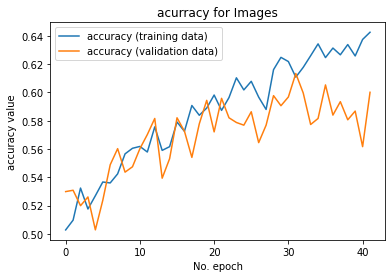

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (validation data)')
plt.title('acurracy for Images')
plt.ylabel('accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

Similarly, we can evaluate the performance of our model over our test `Dataset` as follows

In [ ]:
loss, acc = model.evaluate(test_dataset)
print(f"Loss {loss:.3}, accuracy {acc:.1%}")

33/33 [==============================] - 6s 142ms/step - loss: 2.1258 - accuracy: 0.2097
Loss 2.13, accuracy 21.0%


The accuracy might seem poor, but take into account we have used a very simple model and this problem has 6 classes. Will you be able to do better?

## Building your network

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
    Design a neural network that maximizes the accuracy over the test data. You can use the training and validation datasets for anything you like, but you can <b>only</b> use the test data to evaluate the model performance. You should obtain a network able to attain at least 40% accuracy over the test set.
</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
    
Some tips and strategies that can help you optimize your network design:

    
- Make use of all the tricks you learned from previous notebooks: convolutional + pooling layers, ReLU activations, dropout... also make sure to use a good optimizer with an adequate loss function, as well as the correct activation for the output layer.
- Configuring the datasets to load the images with a larger size can significantly improve your performance. But be careful, you can also run out of memory (CUDA memory error) if they become too large! Note that for this problem a size larger than 256 might be too large.
- Start with networks with a small number of parameters, so you are able to check fast how well they work. Then you can make your network larger in three directions: larger input images, more layers and more kernels per convolutional layer or units per dense layer. If you use larger images make sure to add more Convolution+Pooling layers, so that only very small images (less than 10x10 pixels) arrive at the Flatten layer.
- If you see large differences in loss between your training data and your validation or test data, try increasing the Dropout probabilities, especially for the Dense layers.
- Make use of that validation data! For instance, use an <a href="https://keras.io/api/callbacks/early_stopping/">**EarlyStopping strategy**</a> to monitor the loss of these validation data, and stop when training when after a number of iterations such loss has not decreased. Configuring the EarlyStopping to restore the best weights found in the optimization is also useful.
</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/pro.png" height="80" width="80" style="float: right;"/>

***
<font color=#259b4c>
    
Other advanced strategies you can try are:

- Use **image augmentation techniques** to artifically create new training images. To do so, explore the rest of layers available in the <a href="https://keras.io/api/layers/preprocessing_layers/image_preprocessing/">Keras Image Preprocessing module</a>.
- Use <a href="https://keras.io/api/layers/normalization_layers/batch_normalization/">BatchNormalization</a> layers to improve the optimization procedure.
    
It you use all the tricks, it is possible to obtain more than 60% accuracy in the test set.

</font>

***

In [ ]:
print(image_size)

32


In [ ]:
train_dataset, val_dataset, test_dataset = create_datasets(TRAINDIR, VALDIR, TESTDIR, image_size=128, batch_size=256)

Found 6082 files belonging to 6 classes.
Found 2108 files belonging to 6 classes.
Found 2070 files belonging to 6 classes.


In [ ]:
from keras.callbacks import EarlyStopping
es = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta = 0.01,
    patience=10,
    verbose=1,
    mode="min",
    restore_best_weights=True
    
)

In [ ]:
image_size=128

model = Sequential()
model.add(Rescaling(scale=1./255, input_shape=(image_size, image_size, 3)))
model.add(Convolution2D(16, (3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(16, (3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.75))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
history = model.fit(train_dataset, epochs=100, validation_data = val_dataset, callbacks=[es] )

Epoch 1/100
24/24 [==============================] - 49s 617ms/step - loss: 1.9206 - accuracy: 0.2143 - val_loss: 1.7309 - val_accuracy: 0.2842
Epoch 2/100
24/24 [==============================] - 16s 544ms/step - loss: 1.7412 - accuracy: 0.2430 - val_loss: 1.6619 - val_accuracy: 0.2979
Epoch 3/100
24/24 [==============================] - 17s 581ms/step - loss: 1.6809 - accuracy: 0.2518 - val_loss: 1.6132 - val_accuracy: 0.3102
Epoch 4/100
24/24 [==============================] - 17s 565ms/step - loss: 1.6279 - accuracy: 0.2855 - val_loss: 1.6036 - val_accuracy: 0.3159
Epoch 5/100
24/24 [==============================] - 17s 559ms/step - loss: 1.6080 - accuracy: 0.3023 - val_loss: 1.5958 - val_accuracy: 0.3311
Epoch 6/100
24/24 [==============================] - 17s 560ms/step - loss: 1.5875 - accuracy: 0.3041 - val_loss: 1.5441 - val_accuracy: 0.3425
Epoch 7/100
24/24 [==============================] - 17s 556ms/step - loss: 1.5677 - accuracy: 0.3306 - val_loss: 1.5530 - val_accuracy:

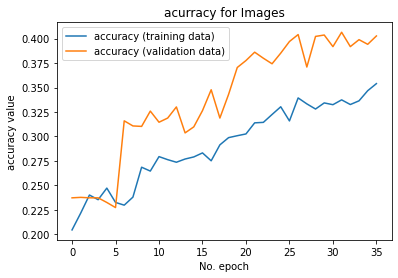

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (validation data)')
plt.title('acurracy for Images')
plt.ylabel('accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
loss, acc = model.evaluate(test_dataset)
print(f"Loss {loss:.3}, accuracy {acc:.1%}")

9/9 [==============================] - 5s 57ms/step - loss: 1.4774 - accuracy: 0.4198
Loss 1.48, accuracy 42.0%


In [ ]:
image_size=128
model = Sequential()
model.add(RandomFlip(mode='horizontal'))
model.add(RandomZoom( height_factor=(-0.6,0.6), width_factor=(-0.6,0.6)))
# model.add(RandomRotation(factor= (-0.6,0.6)))


model.add(Rescaling(scale=1./255, input_shape=(image_size, image_size, 3)))

model.add(Convolution2D(16, (3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Convolution2D(32, (6,6), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, (3,3), padding='valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(12,12)))


model.add(Flatten())
model.add(Dense(2000, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(514, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [ ]:
history = model.fit(train_dataset, epochs=100, validation_data = val_dataset, callbacks=[es] )

Epoch 1/100
24/24 [==============================] - 21s 686ms/step - loss: 1.7524 - accuracy: 0.2318 - val_loss: 1.6889 - val_accuracy: 0.2391
Epoch 2/100
24/24 [==============================] - 19s 660ms/step - loss: 1.6930 - accuracy: 0.2507 - val_loss: 1.6138 - val_accuracy: 0.3240
Epoch 3/100
24/24 [==============================] - 19s 647ms/step - loss: 1.5979 - accuracy: 0.3303 - val_loss: 1.4664 - val_accuracy: 0.4118
Epoch 4/100
24/24 [==============================] - 19s 636ms/step - loss: 1.5434 - accuracy: 0.3555 - val_loss: 1.4658 - val_accuracy: 0.4198
Epoch 5/100
24/24 [==============================] - 19s 638ms/step - loss: 1.4735 - accuracy: 0.3995 - val_loss: 1.3911 - val_accuracy: 0.4473
Epoch 6/100
24/24 [==============================] - 18s 634ms/step - loss: 1.4429 - accuracy: 0.4196 - val_loss: 1.3551 - val_accuracy: 0.4730
Epoch 7/100
24/24 [==============================] - 19s 641ms/step - loss: 1.4051 - accuracy: 0.4307 - val_loss: 1.3185 - val_accuracy:

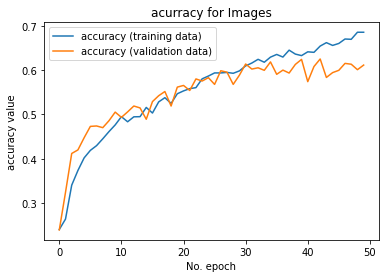

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (validation data)')
plt.title('acurracy for Images')
plt.ylabel('accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
loss, acc = model.evaluate(test_dataset)
print(f"Loss {loss:.3}, accuracy {acc:.1%}")

9/9 [==============================] - 4s 46ms/step - loss: 1.0625 - accuracy: 0.6271
Loss 1.06, accuracy 62.7%


## Transfer learning

While designing your own network might produce some nice results, it is generally better to transfer the knowledge available in a pre-trained network. This not only can produce better results, but also saves a lot of design time. The [Keras Applications](https://keras.io/api/applications/) module contains several network designs ready to use. For instance, to exploit the famous VGG16 network we do

In [ ]:
from keras.applications import VGG16

vgg16_model = VGG16(include_top=False, input_shape=(image_size, image_size, 3))

58892288/58889256 [==============================] - 1s 0us/step


By default all Keras Applications networks are preloaded with the weights that were obtained from training the network over the [ImageNet dataset](http://www.image-net.org/). To adapt the network to our problem we need to specify the shape of our input images, and also remove the output layers (top) of the original network, since we have a different number of classes.

Now, how do we do transfer learning over this network? We will show here how to implement the bottleneck features strategy. First, we will mark the VGG16 model as **non-trainable**, so that the weights remain frozen

In [ ]:
vgg16_model.trainable = False

Now we will build a neural network that includes the VGG16 model as one of its "layers". Since the VGG16 was trained with an specific way of normalizing the images, we will need to normalize our images in the same way. Conveniently, Keras also provides a function for doing VGG16-style normalization.

In [ ]:
from keras.applications.vgg16 import preprocess_input

We can try this with some image ir our dataset

In [ ]:
for X_batch, _ in train_dataset:
    break
    
print(f"Before normalizing: {X_batch[0, :3, :3, :]}")
print(f"After normalizing: {preprocess_input(X_batch)[0, :3, :3, :]}")

Before normalizing: [[[10.5   4.5   8.5 ]
  [ 8.75  3.25  7.25]
  [ 8.25  3.25  7.25]]

 [[ 7.5   1.5   5.5 ]
  [ 8.    2.5   6.5 ]
  [ 7.5   2.5   6.5 ]]

 [[ 7.5   1.5   5.5 ]
  [ 7.5   2.    6.  ]
  [ 7.    2.    6.  ]]]
After normalizing: [[[ -95.439 -112.279 -113.18 ]
  [ -96.689 -113.529 -114.93 ]
  [ -96.689 -113.529 -115.43 ]]

 [[ -98.439 -115.279 -116.18 ]
  [ -97.439 -114.279 -115.68 ]
  [ -97.439 -114.279 -116.18 ]]

 [[ -98.439 -115.279 -116.18 ]
  [ -97.939 -114.779 -116.18 ]
  [ -97.939 -114.779 -116.68 ]]]


The normalization required by VGG16 involves swapping the order of color channels (RGB -> BGR) and substracting the mean values over the ImageNet dataset for each color channel separately. Fortunately the `preprocess_input` function does all the work for us. Furthermore, we can plug this function as the first layer of our network, similarly to the `Rescaling` we used before. We can do this with a `Lambda` layer, which allows building a layer out of any (differentiable!) function. Let's start our model with this layer.

In [ ]:
train_dataset, val_dataset, test_dataset = create_datasets(TRAINDIR, VALDIR, TESTDIR, image_size=32, batch_size=256)

Found 6082 files belonging to 6 classes.
Found 2108 files belonging to 6 classes.
Found 2070 files belonging to 6 classes.


In [ ]:
from keras.layers import Lambda
image_size=32
model = Sequential()
model.add(Lambda(preprocess_input, input_shape=(image_size, image_size, 3)))

After this, we can add the whole VGG16 network as a layer, and our custom trainable layers after it. Note this is an overly simple model with some mistakes introduced; a real transfer learning network would have a better design.

In [ ]:
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(6, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_3 (Lambda)            (None, 32, 32, 3)         0         
_________________________________________________________________
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 3078      
Total params: 14,717,766
Trainable params: 3,078
Non-trainable params: 14,714,688
_________________________________________________________________


Notice how in the model summary we can see the whole network has millions of parameters, but since we have frozen the VGG16 part, only a few thousand parameters will be trained: those in the Dense layer.

We can now compile and train this model in the usual way

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=["accuracy"])
model.fit(train_dataset, epochs=1)

loss, acc = model.evaluate(test_dataset)
print(f"Loss {loss:.3}, accuracy {acc:.1%}")

9/9 [==============================] - 5s 73ms/step - loss: 57.3353 - accuracy: 0.3092
Loss 57.3, accuracy 30.9%


<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
    Using the bottleneck strategy, implement a network doing transfer learning from VGG16. If you do it properly, you should be able to obtain better results than with your previously designed network, at least a 80% of accuracy over the test set.
</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
    
Some tips and strategies that can help you optimize your network design:

    
- Include one or more Dense layers with the appropriate activation functions before the output layer.
- Try using a [GlobalAveragePooling layer](https://keras.io/api/layers/pooling_layers/global_average_pooling2d/) instead of a Flatten layer. This layer computes an average of all pixel values for each channel, and sometimes performs better than a regular Flatten.
- And remember all the tricks from the previous exercise!
</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/pro.png" height="80" width="80" style="float: right;"/>

***
<font color=#259b4c>
    
You can further improve the network accuracy with the following ideas

- Use the PRO strategies from the previous exercise.
- Try other pre-trained networks from <a href="https://keras.io/api/applications/">Keras Applications</a>, such as ResNet, Xception or EfficientNet.
- Use more advanced transfer learning strategies, like fine-tuning or a combination of bottleneck features and fine-tuning.
   
If you use all the tricks, it is possible to obtain more than 90% accuracy in the test set.

</font>

***

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
train_dataset, val_dataset, test_dataset = create_datasets(TRAINDIR, VALDIR, TESTDIR, image_size=256, batch_size=256)

Found 6082 files belonging to 6 classes.
Found 2108 files belonging to 6 classes.
Found 2070 files belonging to 6 classes.


In [ ]:
adam_opt = keras.optimizers.Adam(learning_rate=0.0001)

In [ ]:
####### INSERT YOUR CODE HERE
image_size = 128
vgg16_model = VGG16(include_top=False, input_shape=(image_size, image_size, 3))

model = Sequential()
model.add(Lambda(preprocess_input, input_shape=(image_size, image_size, 3)))
model.add(vgg16_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(258, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 128, 128, 3)       0         
_________________________________________________________________
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 258)               132354    
_________________________________________________________________
dropout_1 (Dropout)          (None, 258)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 1554      
Total params: 14,848,596
Trainable params: 14,848,596
Non-trainable params: 0
__________________________________________

In [ ]:
from keras.applications import VGG16

l_rate = 0.001
epochs = 200
decay = l_rate / epochs
image_size = 256
model_vgg = VGG16(include_top=False, input_shape=(image_size, image_size, 3))
model_vgg.trainable = False
model_transfer_full_5 = Sequential()

model_transfer_full_5.add(RandomFlip(mode='horizontal'))
model_transfer_full_5.add(RandomZoom(height_factor=(-0.6,0.6), width_factor=(-0.6,0.6)))
model_transfer_full_5.add(Lambda(preprocess_input, input_shape=(image_size, image_size, 3)))

model_transfer_full_5.add(model_vgg)
# model_transfer_full_5.add(Convolution2D(16, (3,3), padding='valid', activation='relu'))
# model_transfer_full_5.add(MaxPooling2D(pool_size=(2,2)))
# model_transfer_full_5.add(Convolution2D(4, (3,3), padding='valid', activation='relu'))
# model_transfer_full_5.add(MaxPooling2D(pool_size=(2,2)))
model_transfer_full_5.add(tf.keras.layers.GlobalAveragePooling2D())
# model_transfer_full_5.add(Dropout(0.2))
model_transfer_full_5.add(Dense(5000))
model_transfer_full_5.add(Dropout(0.25))
model_transfer_full_5.add(Dense(2000))
model_transfer_full_5.add(Dropout(0.25))
model_transfer_full_5.add(Dense(1028))
model_transfer_full_5.add(Dropout(0.25))
model_transfer_full_5.add(Dense(514))
model_transfer_full_5.add(Dropout(0.25))
model_transfer_full_5.add(Dense(256))
model_transfer_full_5.add(Dropout(0.25))
model_transfer_full_5.add(Dense(128))
model_transfer_full_5.add(Dropout(0.25))
model_transfer_full_5.add(Dense(6, activation='softmax'))

# Hiperparámetros
adam = tf.keras.optimizers.Adam(lr=0.00001)
es_1 = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min',restore_best_weights=True)
mcp_save = tf.keras.callbacks.ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')

# Compilador
model_transfer_full_5.compile(loss='categorical_crossentropy', optimizer=adam, metrics=["accuracy"])


history = model_transfer_full_5.fit(train_dataset, epochs=epochs, validation_data = val_dataset, callbacks = [es_1, mcp_save, reduce_lr_loss], shuffle=True)

Epoch 1/200
24/24 [==============================] - 141s 5s/step - loss: 14.7350 - accuracy: 0.2325 - val_loss: 2.8138 - val_accuracy: 0.6233
Epoch 2/200
24/24 [==============================] - 74s 3s/step - loss: 9.1864 - accuracy: 0.3888 - val_loss: 2.2758 - val_accuracy: 0.6973
Epoch 3/200
24/24 [==============================] - 74s 3s/step - loss: 7.4158 - accuracy: 0.4656 - val_loss: 2.1128 - val_accuracy: 0.7315
Epoch 4/200
24/24 [==============================] - 74s 3s/step - loss: 6.7721 - accuracy: 0.5150 - val_loss: 2.3519 - val_accuracy: 0.7324
Epoch 5/200
24/24 [==============================] - 73s 3s/step - loss: 6.4994 - accuracy: 0.5291 - val_loss: 2.3074 - val_accuracy: 0.7495
Epoch 6/200
24/24 [==============================] - 73s 3s/step - loss: 5.7306 - accuracy: 0.5655 - val_loss: 1.9993 - val_accuracy: 0.7713
Epoch 7/200
24/24 [==============================] - 73s 3s/step - loss: 5.7801 - accuracy: 0.5701 - val_loss: 2.0543 - val_accuracy: 0.7704
Epoch 8/200

In [ ]:
loss, acc = model_transfer_full_5.evaluate(test_dataset)
print(f"Loss {loss:.3}, accuracy {acc:.1%}")

9/9 [==============================] - 25s 2s/step - loss: 0.9798 - accuracy: 0.8314
Loss 0.98, accuracy 83.1%


In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (validation data)')
plt.title('acurracy for Images')
plt.ylabel('accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

Found 6082 files belonging to 6 classes.
Found 2108 files belonging to 6 classes.
Found 2070 files belonging to 6 classes.
83689472/83683744 [==============================] - 0s 0us/step
Epoch 1/200
96/96 [==============================] - 189s 2s/step - loss: 1.0319 - accuracy: 0.6212 - val_loss: 2.6599 - val_accuracy: 0.4991
Epoch 2/200
96/96 [==============================] - 183s 2s/step - loss: 0.6432 - accuracy: 0.7812 - val_loss: 1.2844 - val_accuracy: 0.6689
Epoch 3/200
96/96 [==============================] - 185s 2s/step - loss: 0.5028 - accuracy: 0.8300 - val_loss: 1.1727 - val_accuracy: 0.6784
Epoch 4/200
96/96 [==============================] - 184s 2s/step - loss: 0.5491 - accuracy: 0.8131 - val_loss: 0.6961 - val_accuracy: 0.7756
Epoch 5/200
96/96 [==============================] - 185s 2s/step - loss: 0.4101 - accuracy: 0.8609 - val_loss: 2.1099 - val_accuracy: 0.6380
Epoch 6/200
96/96 [==============================] - 185s 2s/step - loss: 0.4344 - accuracy: 0.8563 - 

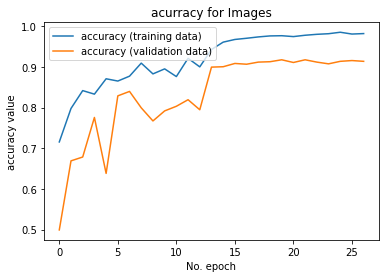

33/33 [==============================] - 19s 525ms/step - loss: 0.3075 - accuracy: 0.9256
Loss 0.308, accuracy 92.6%


In [ ]:
# Modelo Xception

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras import regularizers

# MODELO Frankestein
image_size = 258
batch_size = 64
l_rate = 0.001
epochs = 200
decay = l_rate / epochs

train_dataset, val_dataset, test_dataset = create_datasets(TRAINDIR, VALDIR, TESTDIR, image_size=image_size, batch_size=batch_size)

# Test whether all returned objects are valid Tensorflow datasets
assert isinstance(train_dataset, tf.data.Dataset)
assert isinstance(val_dataset, tf.data.Dataset)
assert isinstance(test_dataset, tf.data.Dataset)

model_Xception = tf.keras.applications.xception.Xception(weights="imagenet", include_top=False, input_shape=(image_size, image_size, 3))

model_transfer_full_F = Sequential()

model_transfer_full_F.add(RandomFlip(mode='horizontal'))
model_transfer_full_F.add(RandomZoom(height_factor=(-0.6,0.6), width_factor=(-0.6,0.6)))

model_transfer_full_F.add(model_Xception)
model_transfer_full_F.add(tf.keras.layers.GlobalAveragePooling2D())
model_transfer_full_F.add(Dropout(0.2))
model_transfer_full_F.add(Dense(100, activation='relu'))
model_transfer_full_F.add(Dense(6, activation='softmax'))

# Hiperparámetros
adam = tf.keras.optimizers.Adam(lr=0.001)reduce_lr_loss = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')

es_1 = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = tf.keras.callbacks.ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')

# Compilador
model_transfer_full_F.compile(loss='categorical_crossentropy', optimizer=adam, metrics=["accuracy"])

# Entrenamiento 
history = model_transfer_full_F.fit(train_dataset, epochs=epochs, validation_data = val_dataset, callbacks = [es_1, mcp_save, reduce_lr_loss], shuffle=True)

# Plotting
plt.plot(history.history['accuracy'], label='accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (validation data)')
plt.title('acurracy for Images')
plt.ylabel('accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

# Resultados
loss, acc = model_transfer_full_F.evaluate(test_dataset)
print(f"Loss {loss:.3}, accuracy {acc:.1%}")

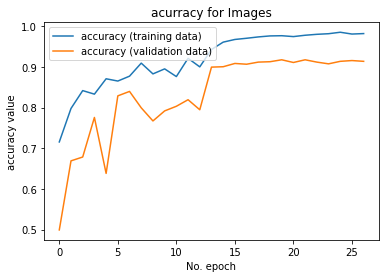

33/33 [==============================] - 16s 436ms/step - loss: 0.3075 - accuracy: 0.9256
Loss 0.308, accuracy 92.6%


In [ ]:
plt.plot(history.history['accuracy'], label='accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (validation data)')
plt.title('acurracy for Images')
plt.ylabel('accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

loss, acc = model_transfer_full_F.evaluate(test_dataset)
print(f"Loss {loss:.3}, accuracy {acc:.1%}")

## Summary of results

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
Write in the following cell a short report explaining what network designs you tried, and what test accuracies you obtained. What worked and what didn't? What have you learned from this exercise?
</font>

***

Para esta práctica, hemos comprobado muchos modelos diferentes, de entre los cuales hemos seleccionado una muestra representativa que aparece representada en la tabla de abajo. A media que hemos ido probando cada uno de ellos, hemos ido ajustado una serie de hiperparámetros que consideramos que han jugado un papel crucial a la hora de obtener estos resultados.

Example results table

|Image processing|Neural network model|Training strategy|Test accuracy|
|----------------|--------------------|-----------------|-------------|
size 128x128, batch size 64 | Rescaling + (Conv2D(64) + MaxPooling2D + DropOut(0.5)) x2 veces | Train from scratch | 31.6%|
| size 128x128, batch size 64 | Rescaling + Conv2D(16, 3x3, same, relu) + MaxPooling2D + Conv2D(16, 3x3, same, relu) + Flatten + Dense(150,relu) + Dense(6, softmax) | Train from scratch | 49.4%|
| size 128x128, batch size 100 | Rescaling + Conv2D(32, 5x5, same, relu) + MaxPooling2D + Conv2D(64, 5x5, same, relu) + Flatten + Dense(6, softmax) | Train from scratch | 49.7%|
| size 128x128, batch size 32 | Rescaling + Conv2D(16, 3x3, valid, relu) + MaxPooling2D + Conv2D(64, 3x3, valid, relu) + MaxPooling2D + Flatten + Dense(2000, relu) + DropOut(0.25) + Dense(1024, relu) + DropOut(0.25) + Dense(514, relu) + DropOut(0.25) + Dense(64, relu) + DropOut(0.25) + Dense(6, softmax)| Train from scratch | 62.7%|
| size 128x128, batch size 64 | RandomFlip + RandomZoom + Conv2D(16, 3x3, relu) + AveragePooling2D + Conv2D(32, 6x6, relu) + AveragePooling2D +  Conv2D(64, 12x12, relu) + AveragePooling2D + Flatten + Dense(128, relu) + Dense(64, relu) + Dense(6, softmax) | Train from scratch |53.1%|
|size 128x128, batch size 100 | VGG16 + GlobalAveragePooling2D + DropOut(0.2) + Dense(100, relu) + Dense(6, softmax) | VGG16 |78.2%|
|size 128x128, batch size 256 | VGG16 + GlobalAveragePooling2D + Dense(128, relu) + Dense(6, softmax) | VGG16 |83.5%|
|size 128x128, batch size 256| RandomFlip + RandomZoom + GlobalAveragePooling2D + Dense(128, relu) + DropOut(0.25)  + Dense(6, softmax)|InceptionResNetV2|82.1%|
|size 258x258, batch size 64|RandomFlip + RandomZoom +  GlobalAveragePooling2D + DropOut(0.2) + Dense(100, relu) + Dense(6, softmax)|Xception Trainable False|90.2%|
|size 258x258, batch size 64|RandomFlip + RandomZoom +  GlobalAveragePooling2D + DropOut(0.2) + Dense(100, relu) + Dense(6, softmax)|Xception|92.56%|

Fuentes empleadas para el desarrollo de la práctica:

- StackOverflow
- Keras.io
- Github
- Kaggle
- Medium.com
- Arxiv.com
- Reddit: PythonProyects2